In [1]:
#Importação dos modulos que provavelmente ser  ão utilizados.
import time
import datetime
import statsmodels
import numpy as np
import pandas as pd
import pylab as plot
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as matplot
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
marketing_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/marketing_cva_f.csv')

In [3]:
marketing_df.head()

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507


In [4]:
for i in marketing_df.select_dtypes(include = [object]).columns:
    x = marketing_df[i].nunique()
    print("Variável", i , "e temos" ,x ,"unicos ")


Variável Customer e temos 6817 unicos 
Variável State e temos 5 unicos 
Variável Coverage e temos 3 unicos 
Variável loc_type e temos 3 unicos 
Variável Vehicle_Class e temos 6 unicos 


In [5]:
marketing_df=marketing_df.drop(['Customer','State'],axis=1)

In [6]:
marketing_df.head()

,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507


plt.rcParams['figure.facecolor'] = 'white'
marketing_df.hist(bins=100, figsize=(20,15))
plt.show()

pd.plotting.scatter_matrix(marketing_df, alpha=0.2
                           , figsize=(20, 20), diagonal='kde');

In [7]:
labelencoder = LabelEncoder()

In [8]:
for col in marketing_df.select_dtypes(include = [object]).columns:
    col_number = col + '_number_format'
    marketing_df[col_number] = labelencoder.fit_transform(marketing_df[col])

In [9]:
marketing_df_1 = marketing_df.select_dtypes(exclude=['object'])
marketing_df_1.head()

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age,Coverage_number_format,loc_type_number_format,Vehicle_Class_number_format
0,2763.519279,56274,69,32,5,384.811147,40.696695,0,1,5
1,12887.431650,48767,108,18,38,566.472247,48.755298,2,1,5
2,2813.692575,43836,73,12,44,138.130879,70.394474,0,0,0
3,8256.297800,62902,69,14,94,159.383042,53.460212,0,0,5
4,5380.898636,55350,67,0,13,321.600000,32.811507,0,1,0


# **Elbow**

In [10]:
#Modelo a ser utilizado para o elbow é o kmeans
model = KMeans()

In [11]:
X = marketing_df_1.loc[:, marketing_df_1.columns != 'Coverage_number_format']
y = marketing_df_1['Coverage_number_format']

In [12]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

C:\Users\bruno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bruno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bruno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bruno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

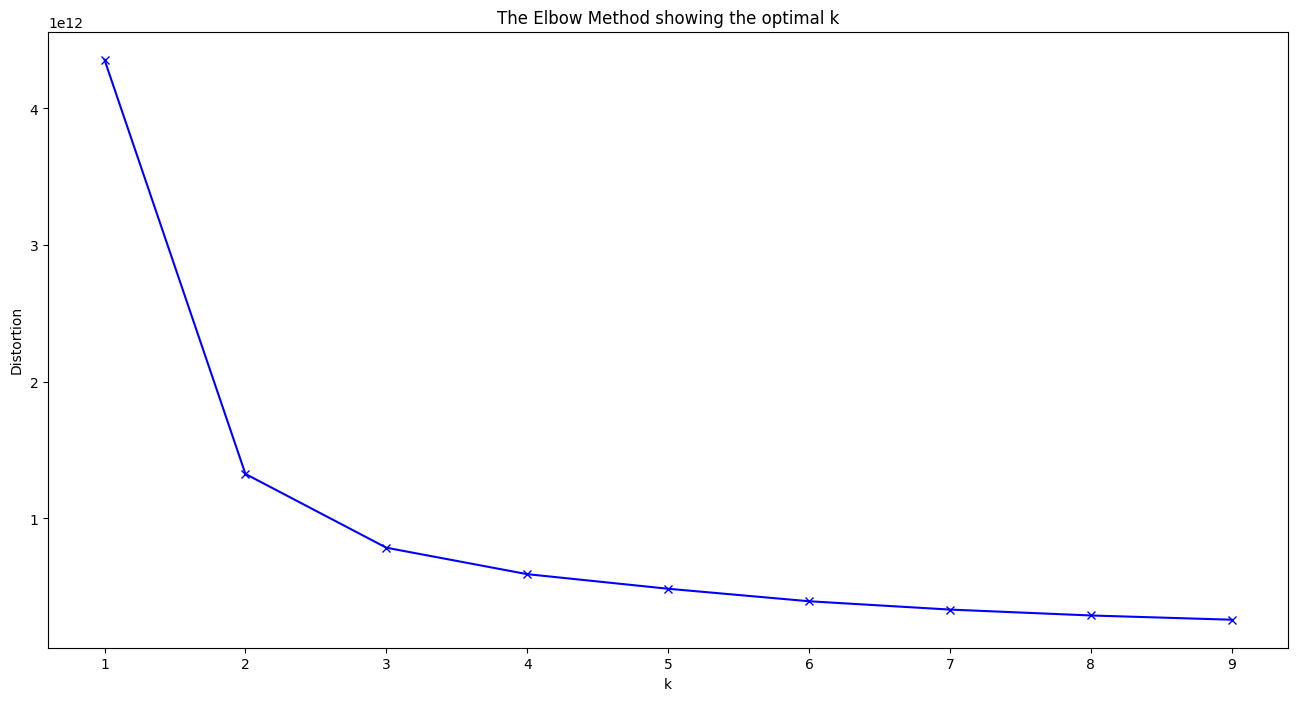

In [13]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [14]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X) 

C:\Users\bruno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [15]:
marketing_df_1['k_means']=kmeanModel.predict(X)

In [16]:
marketing_df_1

,CLV,Income,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,avg_vehicle_age,Coverage_number_format,loc_type_number_format,Vehicle_Class_number_format,k_means
0,2763.519279,56274,69,32,5,384.811147,40.696695,0,1,5,2
1,12887.431650,48767,108,18,38,566.472247,48.755298,2,1,5,2
2,2813.692575,43836,73,12,44,138.130879,70.394474,0,0,0,2
3,8256.297800,62902,69,14,94,159.383042,53.460212,0,0,5,2
4,5380.898636,55350,67,0,13,321.600000,32.811507,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
6812,5032.165498,66367,64,6,48,307.200000,37.492591,0,1,5,2
6813,4100.398533,47761,104,16,58,541.282007,48.946675,2,1,0,2
6814,23405.987980,71941,73,18,89,198.234764,65.310053,0,2,0,0
6815,3096.511217,21604,79,14,28,379.200000,48.002914,1,1,0,1


Text(0.5, 1.0, 'K_Means')

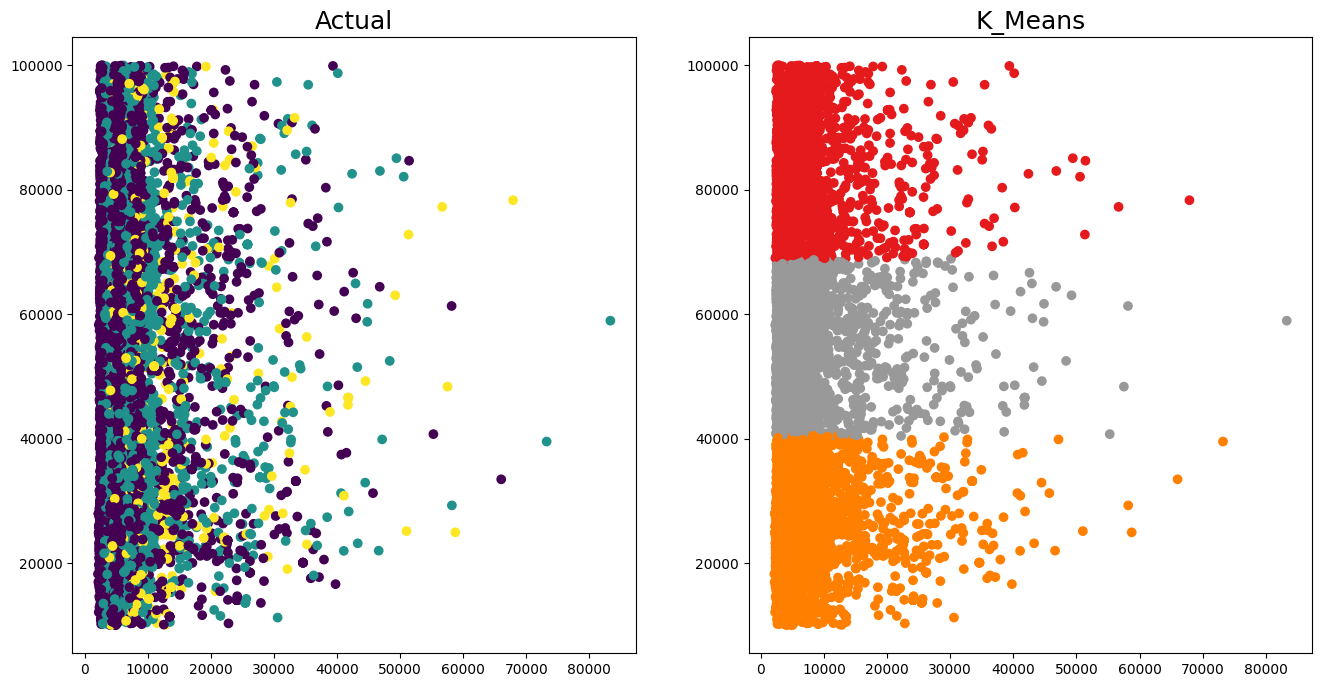

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(marketing_df_1['CLV'],marketing_df_1['Income'],c = marketing_df_1['Coverage_number_format'])
axes[1].scatter(marketing_df_1['CLV'],marketing_df_1['Income'],c = marketing_df_1['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

**Segunda tentativa utilizando biblioteca criada pelo XXXX**

def calculate_wcss(data,n,m):
    wcss =[]
    for i in range(n,m):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
        
    plt.plot(range(n, m), wcss)
    plt.title(coverage)
    plt.xlabel('Numero de Clusters')
    plt.xticks(range(1, 22))
    plt.ylabel('WSS')
    plt.show()

for coverage in cove:
    dt = marketing_df.iloc[:,7:][marketing_df["Coverage"]== coverage]
    calculate_wcss(dt,2,21)
    plt.show()

from yellowbrick.cluster import KElbowVisualizer
pip install -U yellowbrick

model = KMeans()

visualizer = KElbowVisualizer(model, k = (2,21), timings = False)

visualizer.fit(marketing_df_teste)
visualizer.show

# **Cilhueta**

In [18]:
X = marketing_df_1.loc[:, marketing_df_1.columns != 'Coverage_number_format']
y = marketing_df_1['Coverage_number_format']

In [19]:
y

0       0
1       2
2       0
3       0
4       0
       ..
6812    0
6813    2
6814    0
6815    1
6816    1
Name: Coverage_number_format, Length: 6817, dtype: int32

In [20]:
a, b = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

In [40]:
b.shape

(500,)

In [41]:
range_n_clusters = [2, 3, 4, 5, 6]

For n_clusters = 2 The average silhouette_score is : 0.5829580553212305
For n_clusters = 3 The average silhouette_score is : 0.506715734692426
For n_clusters = 4 The average silhouette_score is : 0.4499870928955517
For n_clusters = 5 The average silhouette_score is : 0.4671662294436253
For n_clusters = 6 The average silhouette_score is : 0.47516156386216696


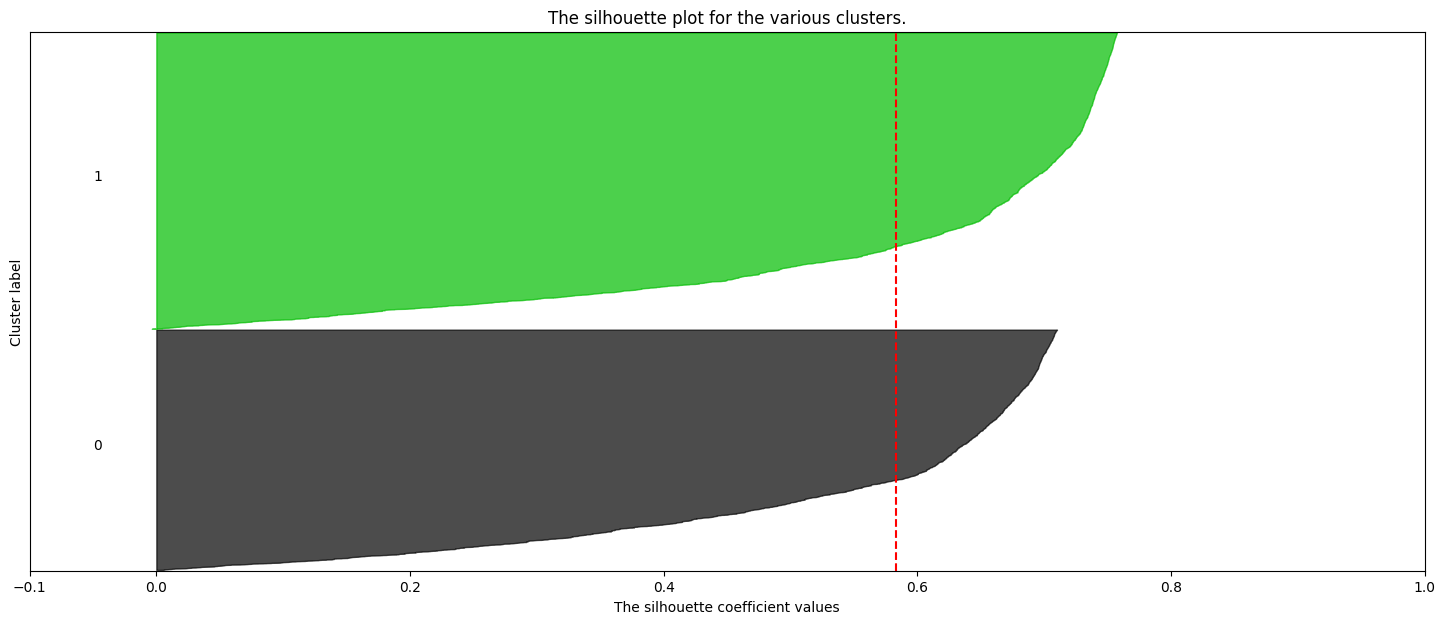

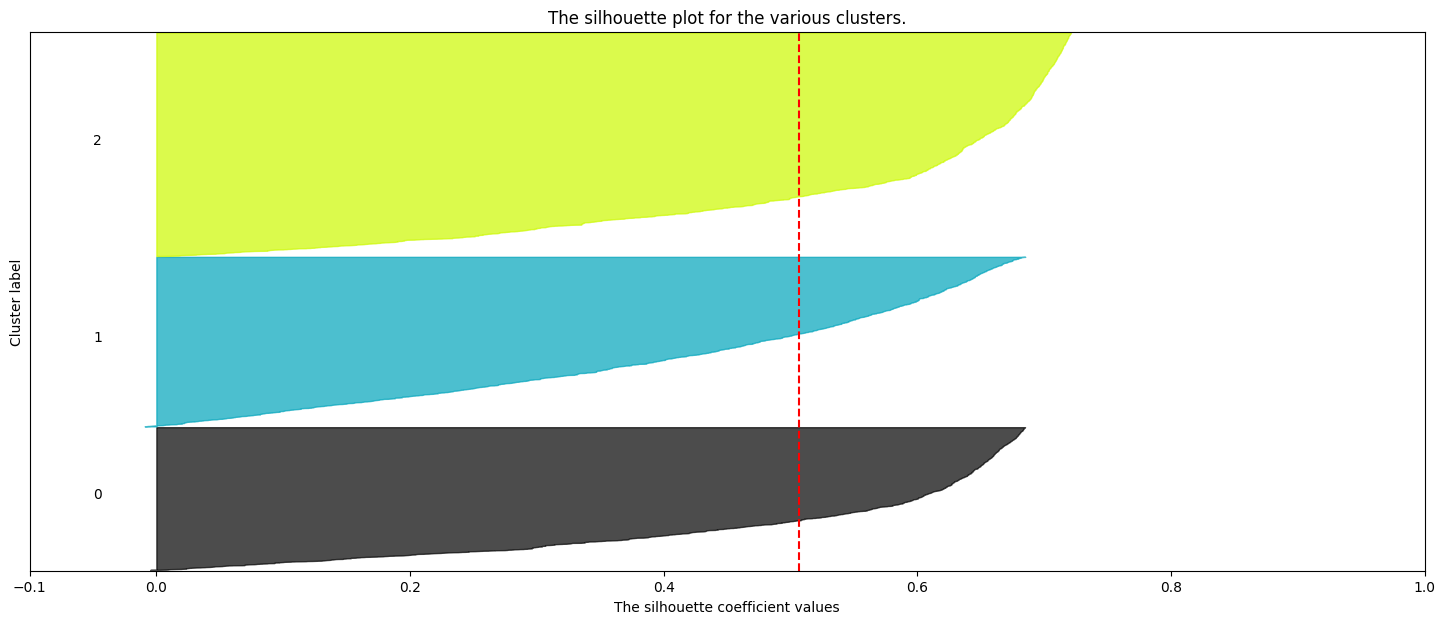

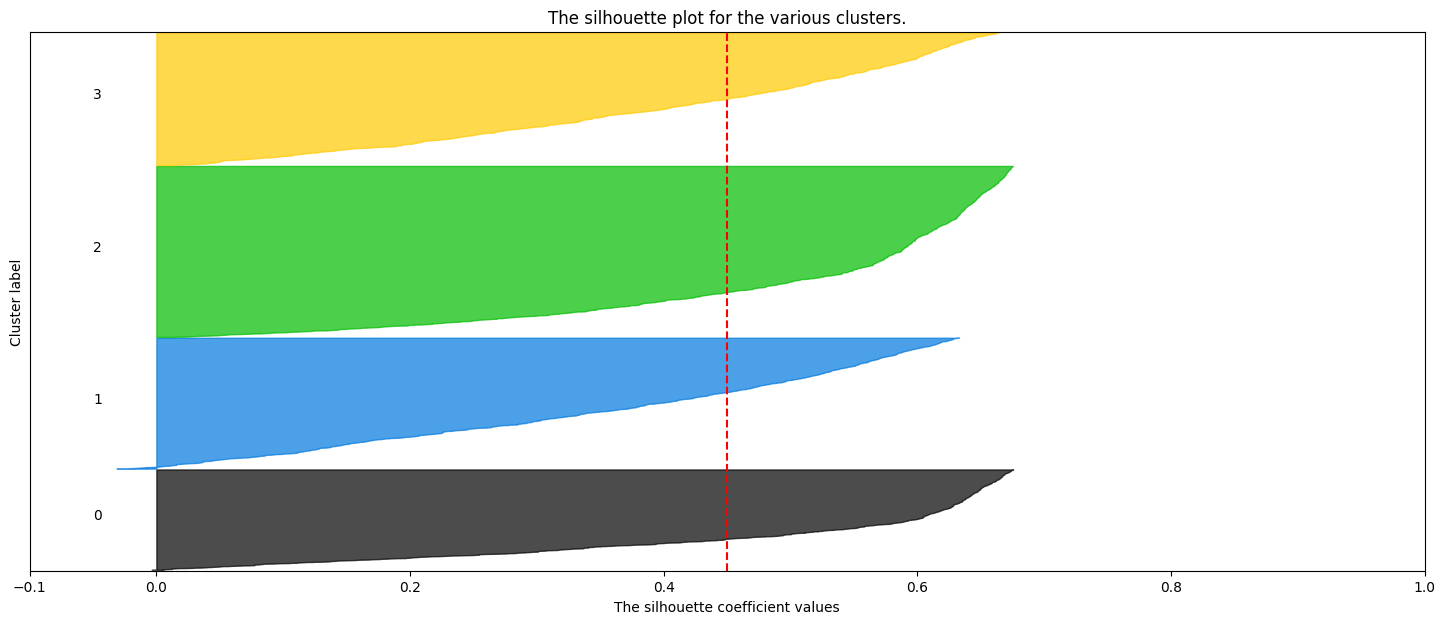

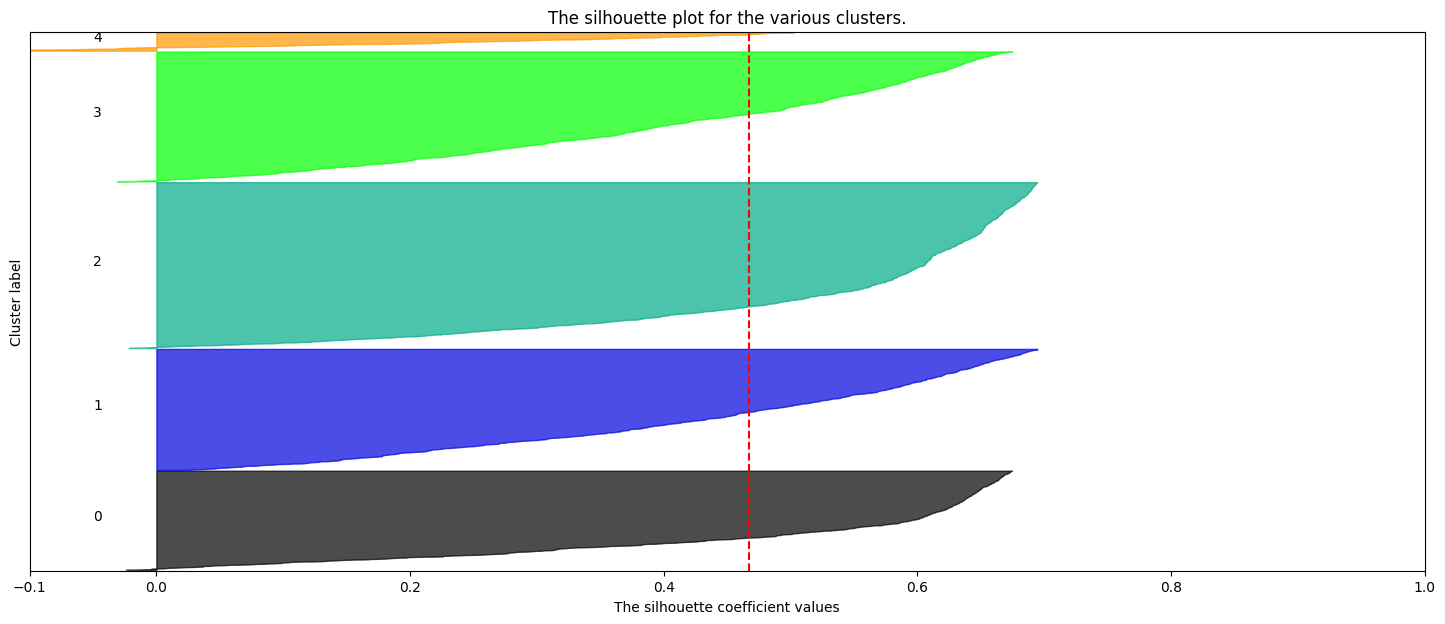

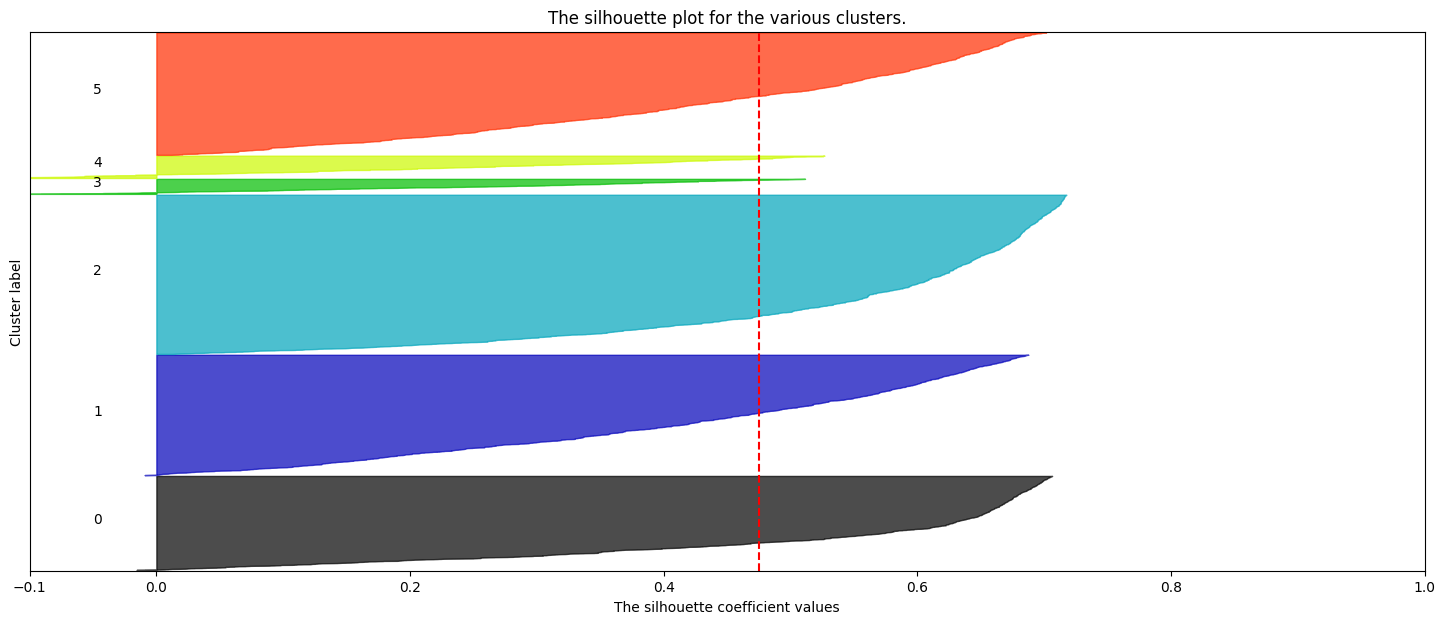

In [45]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
 